# Google Play apps and reviews

Mobile apps are everywhere. They are easy to create and develop, and also can be profitable. Therefore, more and more apps are being developed. In this notebook, will do some comprehensive analytics over apps in Google play accross different categorize. I will look for insights based on the data to support growth.

In [32]:
#load data and remove duplicate
import pandas as pd

apps_with_duplicates = pd.read_csv("dataset/apps.csv")
apps = apps_with_duplicates.drop_duplicates()

print('Lenght of the dataset = ', len(apps))
print(apps_with_duplicates.sample(10))

Lenght of the dataset =  9659
      Unnamed: 0                             App             Category  Rating  \
6259        7304               CG Shikshak Mitan                TOOLS     4.1   
4137        5088                Ag Weather Tools              WEATHER     NaN   
5160        6156          Cordova BG Geolocation  MAPS_AND_NAVIGATION     3.0   
8102        9222              英漢字典 EC Dictionary               FAMILY     4.3   
3631        4537        Learn R Programming Full  BOOKS_AND_REFERENCE     NaN   
2642        3371     Backgrounds (HD Wallpapers)      PERSONALIZATION     4.7   
1953        2475               Pediatric Nursing              MEDICAL     4.9   
2534        3262                           Clear                TOOLS     3.1   
7334        8420  Desperate Housewives: The Game               FAMILY     4.2   
6237        7282  CG Creative Sets: 2D/3D Artist   NEWS_AND_MAGAZINES     4.3   

      Reviews  Size     Installs  Type Price Content Rating  \
6259      295  

## Remove unnecessary character

Look at the result of apps dataframe. There are '$' character in 'Price' column , '+' and ',' character in 'Installs' column. Furthermore, those two columns have object datatype. Even though, those columns must be strict numerical value and int or float datatype because they will used in mathematical opertions. So lets clean that character and change the datatype.

In [9]:
#remove unnecessary character

character_to_remove = ['+', ',', '$']
columns_to_remove = ['Installs', 'Price']

for columns in columns_to_remove:
    for character in character_to_remove:
        apps[columns] = apps[columns].apply(lambda x : x.replace(character, ''))

print(apps.info())
print(apps.sample(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None
      Unnamed: 0                                                App  \
1140        1390                  

In [33]:
apps[apps['Category'] == 'FAMILY']

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1575,2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19.0,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
1576,2018,Coloring & Learn,FAMILY,4.4,12753,51.0,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
1577,2019,Mahjong,FAMILY,4.5,33983,22.0,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
1578,2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46.0,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
1579,2021,Toy Pop Cubes,FAMILY,4.5,5761,21.0,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,10821,Poop FR,FAMILY,NaN,6,2.5,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1,4.0.3 and up
9645,10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
9652,10834,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [15]:
import numpy as np

#convert datatype
apps['Installs'] = apps['Installs'].astype(float)
apps['Price'] = apps['Price'].astype(float)

apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


## Explore the app categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

1) Which category has the highest share of (active) apps in the market?
2) Is any specific category dominating the market?
3) Which categories have the fewest number of apps

In [21]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = apps["Category"].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps["Category"].value_counts()
print(num_apps_in_category)

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


### Insights

1) Category that has highest share of active apps is FAMILY and GAME
2) Interestingly, TOOLS, BUSINESS, and MEDICAL categories are also at the top
3) The fewest number of app is in the BEAUTY category

From the insights we can conclude that most of people use the apps for fun like playing a game that has genre family which is help them to spend their free time with their family without wasting a lot of energy. Besides that, most of apps also used to help their daily activity, their business, and doing some medical stuff.

## Distribution of app ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

In [22]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


### Insights

Based on the result above, we found that average of rating is 4,17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

## Size and Price of an app

Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

1) Does the size of an app affect its rating?
2) Do users really care about system-heavy apps or do they prefer light-weighted apps?
3) Does the price of an app affect its rating?
4) Do users always prefer free apps over paid apps?

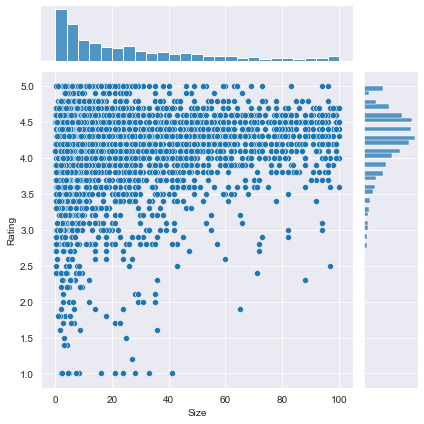

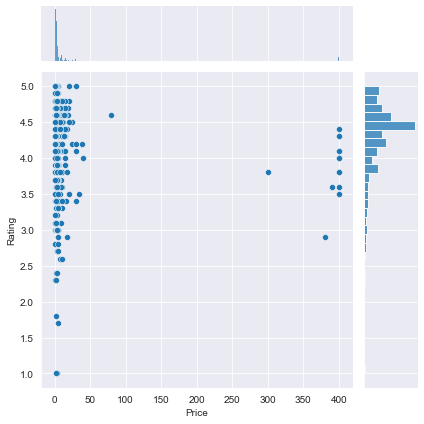

In [26]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[apps["Rating"].notnull() & apps["Size"].notnull()]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps["Type"] == "Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

### Insights

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

## Relation between app category and app price

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

       Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.

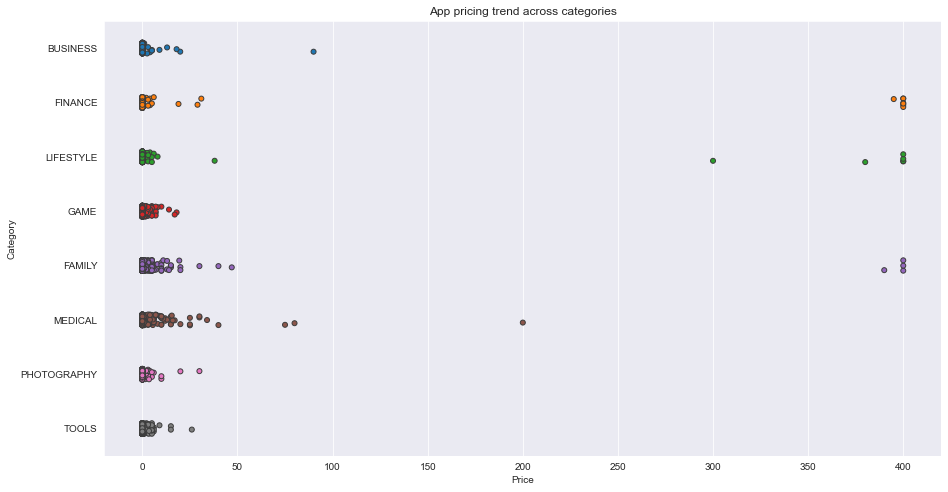

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps["Price"] > 200]
print(apps_above_200[['Category', 'App', 'Price']])

### Insights

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Based on the graph above, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

## Filter out junk apps

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

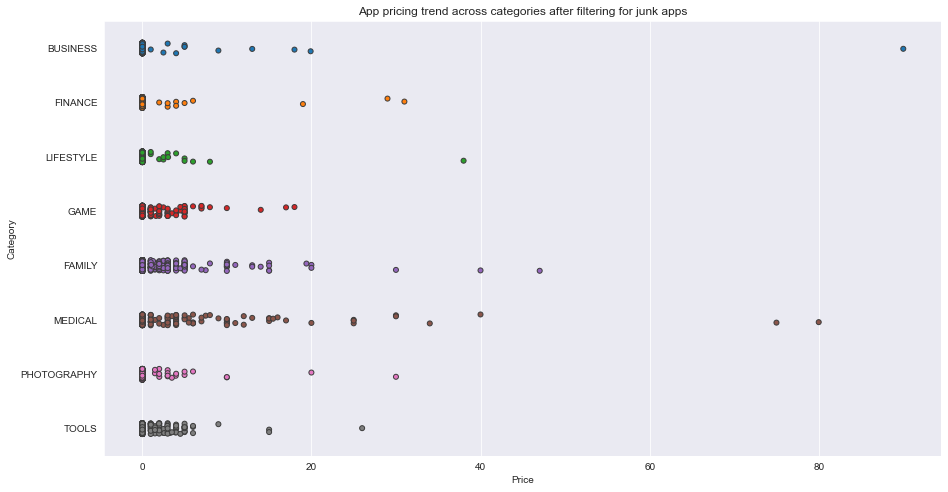

In [28]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## Popularity of paid apps vs free apps

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

1) Free to download.
2) Main source of income often comes from advertisements.
3) Often created by companies that have other products and the app serves as an extension of those products.
4) Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:
1) Users are asked to pay once for the app to download and use it.
2) The user can't really get a feel for the app before buying it.

In [29]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

### Insights

    # Are paid apps installed as much as free apps? 
It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

## Sentiment analysis of user reviews

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

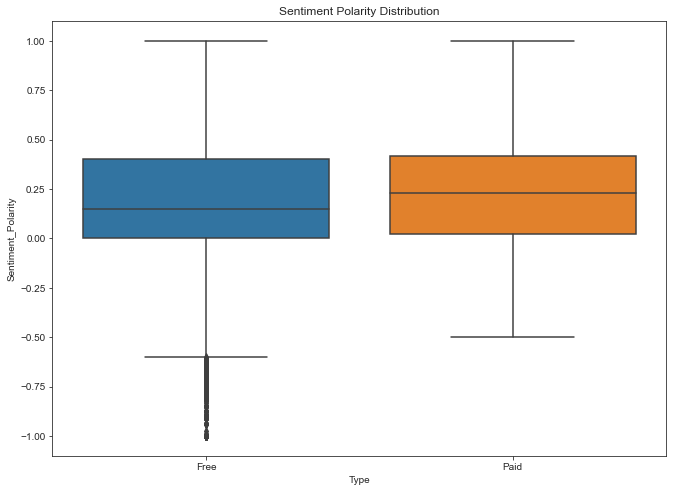

In [31]:
# Load user_reviews.csv
reviews_df = pd.read_csv("dataset/user_reviews.csv")

# Join the two dataframes
merged_df = apps.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df["Type"], y = merged_df["Sentiment_Polarity"], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')